In [1]:
#http://archive.ics.uci.edu/ml/machine-learning-databases/00222/
import numpy as np
from scipy.stats import skew
import scipy.stats as stats
from scipy.stats import skew
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.metrics import mean_squared_error, make_scorer
from IPython.display import display
from sklearn import preprocessing


plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
#load the data and drop all the 
data= pd.read_csv('../input/bank-additional-full.csv', sep=";");
data=data.dropna(axis=0) 
data.head()

data.loc[:, 'education'].unique()
data= data.replace({'education': {'basic.4y': 'basic', 'basic.6y': 'basic', 'basic.9y': 'basic'} } );
data= data.replace({'y': {'yes': 1, 'no': 0} } );

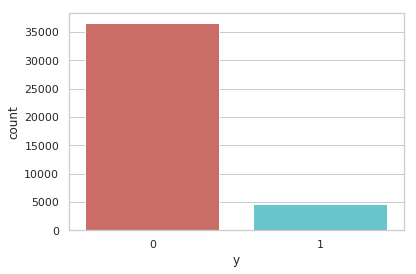

In [3]:
#unitary data analysis
#2.1. Data analysis: unitary data analysis
sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [4]:
#Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. We need to balance the classes. 
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


Text(0, 0.5, 'Frequency of Purchase')

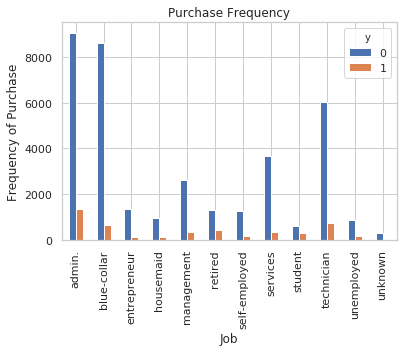

In [5]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Proportion of Customers')

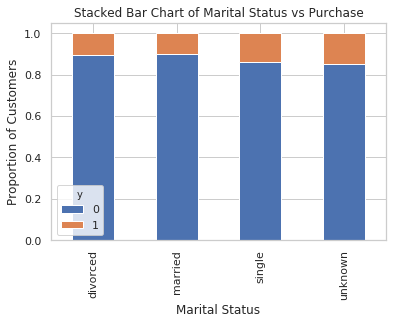

In [6]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

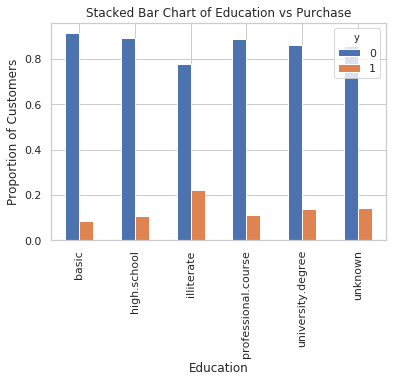

In [7]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Frequency of Purchase')

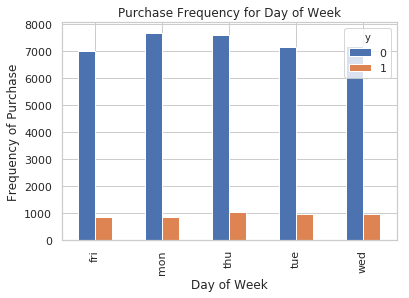

In [8]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Frequency of Purchase')

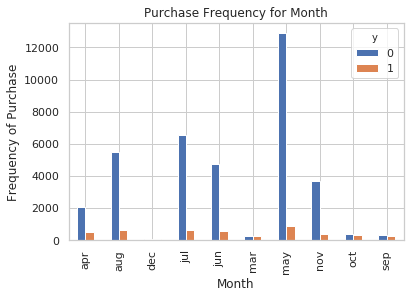

In [9]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

In [10]:
#Create dummy variables.
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_cat=data[ cat_vars].copy();
data_drop=data.drop( cat_vars, axis=1);

data_cat=pd.get_dummies(data_cat);
data_dummy=pd.concat([data_drop, data_cat], axis=1);
data_dummy.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [11]:
#4. balance the two categories: y=0; y=1;
from imblearn.over_sampling import SMOTE
X= data_dummy.loc[:, data_dummy.columns !='y'];
y= data_dummy.loc[:, 'y'];

os=SMOTE(random_state=0);
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0);

os_data_X, os_data_y= os.fit_sample(X_train, y_train);
os_data_X= pd.DataFrame( data= os_data_X, columns= X_train.columns );
os_data_y= pd.DataFrame( data= os_data_y, columns=['y'] );

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data", sum(os_data_y['y']==0) );
print("Number of subscription",sum(os_data_y['y']==1) );
print("Proportion of no subscription data in oversampled data is ",sum(os_data_y['y']==0)/len(os_data_X) )
print("Proportion of subscription data in oversampled data is ",sum(os_data_y['y']==1)/len(os_data_X) )

length of oversampled data is  51158
Number of no subscription in oversampled data 25579
Number of subscription 25579
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [12]:
#5. Recursive feature elimination to select the features.
y_columns=['y'];
X_columns=[i for i in data_dummy if i!= 'y'];

In [29]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs')

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y['y'].values );
print(rfe.support_)
print(rfe.ranking_)

/home/xiaoling/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaoling/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaoling/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaoling/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/xiaoling/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the nu

[False False False False  True False False False  True False False False
  True False  True  True False False  True False False False False False
 False False False False False False False  True  True False False False
  True False False  True False False  True  True  True False False False
  True  True  True  True False False  True False False False  True False
  True]
[33 30  8 35  1 17 19 11  1 28  5 15  1 37  1  1 39 14  1 16 23 40  4 29
 22 41 26 21 38 13  2  1  1  6 42 36  1 31 12  1 20  7  1  1  1 34  9 18
  1  1  1  1 25  3  1 27 24 32  1 10  1]


In [31]:
cols=X_train.columns[ rfe.support_];
X_selected=os_data_X[cols]
y_selected=os_data_y['y']

#Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y_selected, X_selected)
result=logit_model.fit()
print(result.summary2() )

Optimization terminated successfully.
         Current function value: 0.553354
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.202     
Dependent Variable: y                AIC:              56654.9448
Date:               2019-05-06 04:22 BIC:              56822.9557
No. Observations:   51158            Log-Likelihood:   -28308.   
Df Model:           18               LL-Null:          -35460.   
Df Residuals:       51139            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
previous           0.3213   0.1117  2.8760 0.0040  0.1023  0.5403
euribor3m         -0.2863      nan     nan    nan     nan     nan


/home/xiaoling/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/home/xiaoling/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/xiaoling/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/xiaoling/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [32]:
X_selected.columns

Index(['previous', 'euribor3m', 'job_entrepreneur', 'job_management',
       'job_retired', 'job_student', 'education_unknown', 'default_no',
       'housing_unknown', 'loan_unknown', 'contact_telephone', 'month_apr',
       'month_aug', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'day_of_week_mon', 'poutcome_failure', 'poutcome_success'],
      dtype='object')

In [33]:
#6. The p_values for fours variables are very high, remove them;
cols_remove=['default_no','default_unknown','contact_cellular','contact_telephone'];
cols_removed=[i for i in cols if i not in cols_remove]
X_removed= X_selected[cols_removed];
y_removed= y_selected;

In [34]:
logit_model=sm.Logit(y_removed, X_removed);
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.569423
         Iterations 7
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:       0.178     
Dependent Variable:       y                      AIC:                    58295.1042
Date:                     2019-05-06 04:23       BIC:                    58445.4297
No. Observations:         51158                  Log-Likelihood:         -29131.   
Df Model:                 16                     LL-Null:                -35460.   
Df Residuals:             51141                  LLR p-value:            0.0000    
Converged:                1.0000                 Scale:                  1.0000    
No. Iterations:           7.0000                                                   
-----------------------------------------------------------------------------------
                   Coef.    Std.Err.      z     P>|z|      [0.025         0.975]   
---------

In [13]:
#Logistic Regression Model Fitting
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train_rem, X_val_rem, y_train_rem, y_val_rem = train_test_split(X_removed, y_removed, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='lbfgs' )
logreg.fit(X_train_rem, y_train_rem)

NameError: name 'X_removed' is not defined

In [36]:
y_pred = logreg.predict(X_val_rem)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_val_rem, y_val_rem)))

Accuracy of logistic regression classifier on test set: 0.73


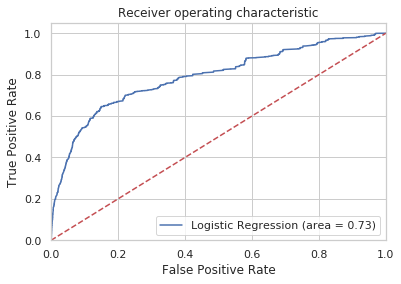

In [37]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_val_rem, logreg.predict(X_val_rem) )
fpr, tpr, thresholds = roc_curve(y_val_rem, logreg.predict_proba(X_val_rem)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

picked 18 features and eliminated the other 0 features


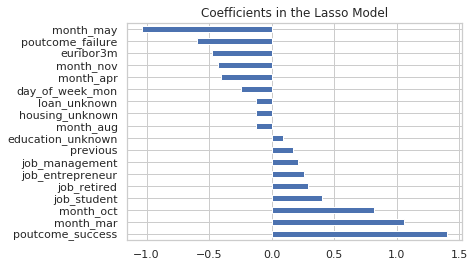

In [46]:
# Plot important coefficients
coefs = pd.Series( logreg.coef_.ravel(), index =X_train_rem.columns.values)
print("picked " + str( np.sum(coefs != 0)) + " features and eliminated the other " +  \
      str(np.sum(coefs == 0)) + " features")
#imp_coefs = pd.concat([coefs.sort_values().head(10), coefs.sort_values().tail(10)])
imp_coefs= coefs.sort_values( ascending= False)
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

poutcome_success     1.398403
month_mar            1.059504
month_oct            0.819986
job_student          0.402357
job_retired          0.289015
job_entrepreneur     0.254989
job_management       0.210402
previous             0.169805
education_unknown    0.091358
month_aug           -0.125931
housing_unknown     -0.126360
loan_unknown        -0.126360
day_of_week_mon     -0.245122
month_apr           -0.405209
month_nov           -0.429326
euribor3m           -0.480317
poutcome_failure    -0.594631
month_may           -1.035002
dtype: float64